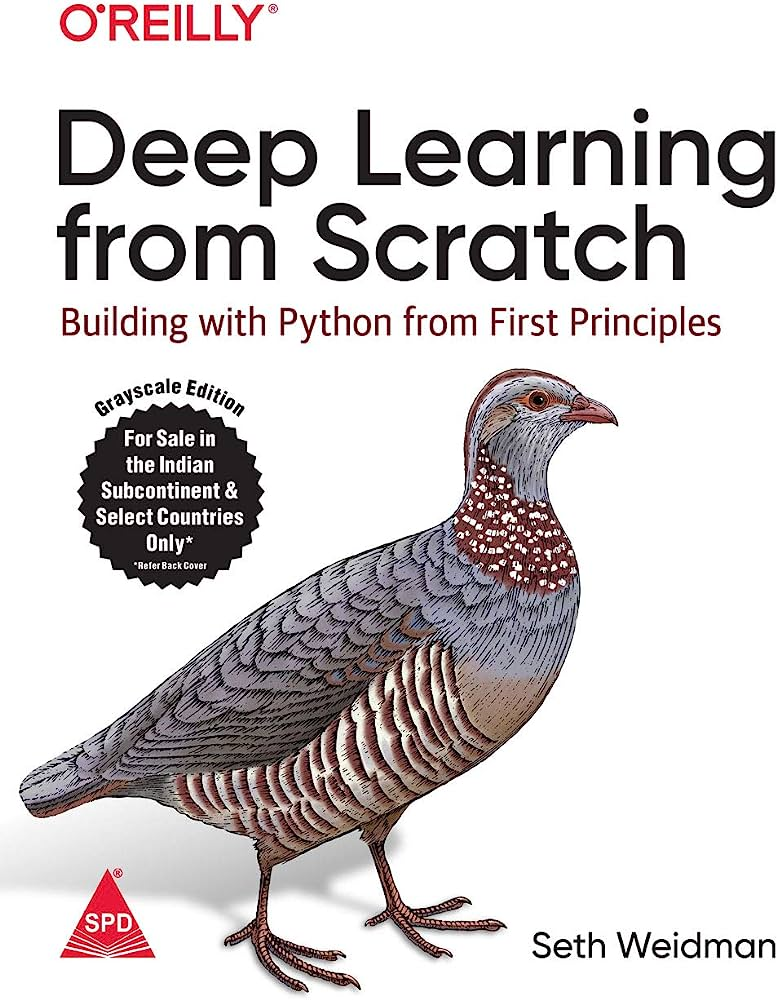

# 

### Prompt : Make me understand "The Chain Rule" in derivatives as a 10 years old

Sure! Let's understand the chain rule using a simpler example.
Imagine you have two friends, Alice and Bob, and they both have different ways of doing things. Alice has a special machine that can change numbers, and Bob has another machine that can do different things with numbers. Now, imagine you want to know how fast something is changing when you use both machines together.

Let's say Alice's machine is represented by the function f, and Bob's machine is represented by the function g. When you use both machines in a row, it's like doing one operation after another. So, you want to know how fast something is changing after you use Alice's machine and then Bob's machine.

To figure out how fast things are changing, you need to use the chain rule. The chain rule tells you that to find the combined rate of change, you need to multiply two things: the rate at which Alice's machine changes things, and the rate at which Bob's machine changes things.

In other words, you need to know how fast Alice's machine changes things when you give it the output of Bob's machine, and you also need to know how fast Bob's machine changes things.

Let's say you want to find out how fast the number 5 changes when you use both machines. First, you put the number 5 into Bob's machine, and it gives you the number 3. Then, you take this number 3 and put it into Alice's machine. And let's say Alice's machine multiplies any number by 2. So, when you put the number 3 into Alice's machine, you get 6 as the final result.

Now, to use the chain rule, you need to know how fast Alice's machine changes things when you give it the output of Bob's machine. If you know that Alice's machine always doubles any number, you know that the rate at which it changes things is 2.

Next, you need to know how fast Bob's machine changes things. Let's say Bob's machine subtracts 1 from any number. So, if you put the number 5 into Bob's machine, it changes to 4. This means the rate at which Bob's machine changes things is -1.
To find the combined rate of change, you multiply these two rates together: 2 (Alice's rate) times -1 (Bob's rate). So, the combined rate of change is -2.
This means that when you use both machines together, the number 5 is changing at a rate of -2. In other words, if you increase the number 5 a little bit, it will decrease by 2.
That's how the chain rule works! It helps you figure out how things change when you use different machines or functions together.


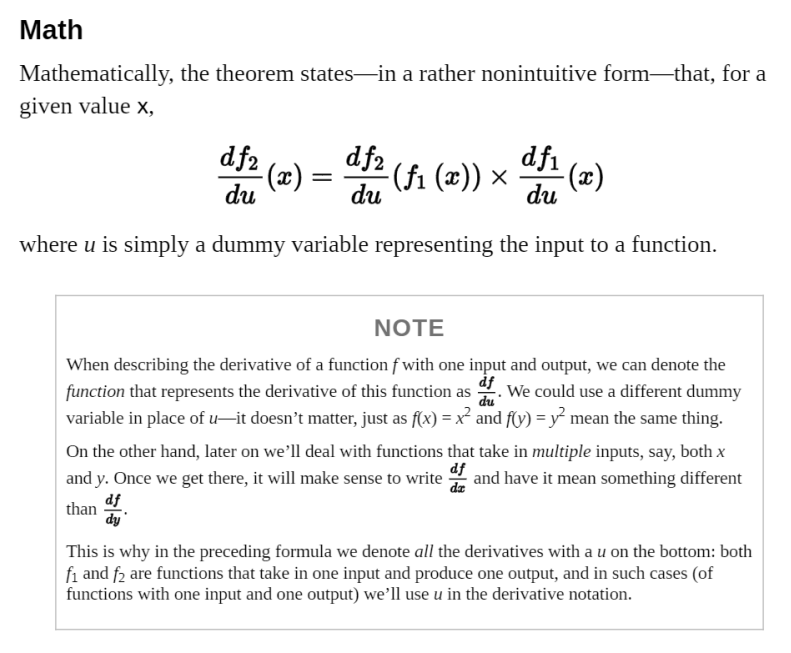

# Diagram

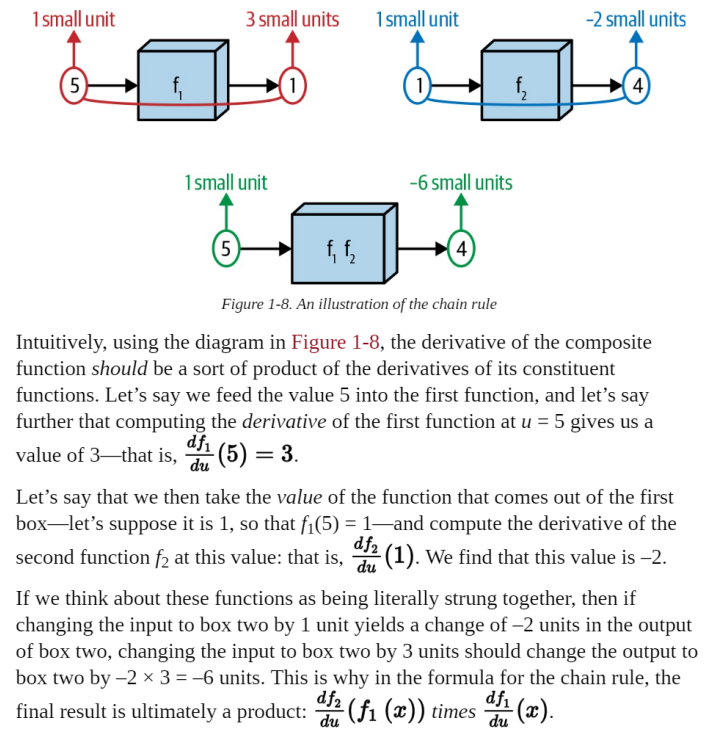

# Code

#### Let's code this up and show that computing derivatives in this way does in fact yields results that "look correct".We'll use the square function from "Basic functions in Numpy" along with sigmoid,another function that ends up being important in deep learning:

In [ ]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import numpy as np

def sigmoid(x: np.array) -> np.array:
    '''Apply the sigmoid function to each element in the input ndarray.'''
    return 1/(1 + np.exp(-x))


The sigmoid function is commonly used to introduce non-linearity in neural networks and to squash the output values between 0 and 1, making it suitable for tasks such as binary classification or probability estimation.

#### And now we code up the chain rule:

In [ ]:
def chain_deriv_2(chain,input_range: np.array)->np.array:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x)))' = f2'(f1(x)) * f1'(x)
    '''
    
    assert len(chain) == 2, \
    "This function requires 'Chain'objects of length 2"
    
    assert input_range.ndim == 1, \
    "Function requires a 1-D ndarray as input_range"
    
    f1 = chain[0]
    f2 = chain[1]
    
    #df1/dx
    f1_of_x =f1(input_range)
    
    #df1/du
    df1dx = deriv(f1, input_range)
    
    #df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))
    
    #Multiplying these quantities together at each point
    return df1dx * df2du


In [ ]:
import matplotlib.pyplot as plt

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(chain_1, PLOT_RANGE)
plot_chain_deriv(chain_1, PLOT_RANGE)

plot_chain(chain_2, PLOT_RANGE)
plot_chain_deriv(chain_2, PLOT_RANGE)